<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns=100
pd.options.display.max_colwidth=60
pd.options.display.max_info_columns = 100
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [6]:
# Remove Duplicate
df.drop_duplicates(inplace =True)

In [7]:
df.isna().sum()

Respondent                   0
MainBranch                   0
Hobbyist                     0
OpenSourcer                  0
OpenSource                  81
Employment                   0
Country                      0
Student                     51
EdLevel                    112
UndergradMajor             737
EduOther                   164
OrgSize                     96
DevType                     65
YearsCode                    9
Age1stCode                  13
YearsCodePro                16
CareerSat                    0
JobSat                       1
MgrIdiot                   493
MgrMoney                   497
MgrWant                    493
JobSeek                      0
LastHireDate                 0
LastInt                    413
FizzBuzz                    37
JobFactors                   3
ResumeUpdate                39
CurrencySymbol               0
CurrencyDesc                 0
CompTotal                  809
CompFreq                   206
ConvertedComp              816
WorkWeek

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [8]:
import numpy as np


count:  [9659  238  115  125   99  131   34   15   15  151]


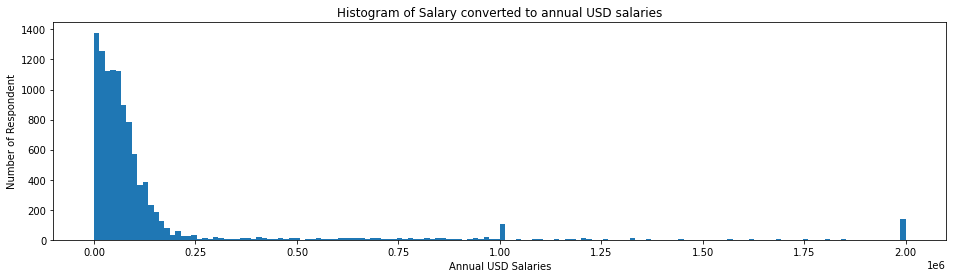

In [9]:
count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
print('count: ', count)
df['ConvertedComp'].plot(kind='hist', bins=150, figsize=(16,4))
plt.title('Histogram of Salary converted to annual USD salaries')
plt.ylabel('Number of Respondent')
plt.xlabel('Annual USD Salaries')
plt.show()
#fig = px.histogram(df, x='ConvertedComp', marginal="box", )
#fig.show()

Plot the histogram for the column `ConvertedComp`.


In [10]:
# your code goes here
plt.figure(figsize=(16,4))
fig = px.histogram(df, x='ConvertedComp', marginal="box")
fig.show()

<Figure size 1152x288 with 0 Axes>

What is the median of the column `ConvertedComp`?


In [11]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [ ]:
df[df['Gender'] = '']['ConvertedComp'].median()

How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
df.groupby('Gender')['Gender'].count().reset_index(name='Count').sort_values('Count', ascending=False)

,Gender,Count
0,Man,10480
3,Woman,731
2,"Non-binary, genderqueer, or gender non-conforming",63
1,"Man;Non-binary, genderqueer, or gender non-conforming",26
6,"Woman;Non-binary, genderqueer, or gender non-conforming",14
4,Woman;Man,9
5,"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


In [14]:
a= df['Age'].describe()
a[3:8]

min   16.00
25%   25.00
50%   29.00
75%   35.00
max   99.00
Name: Age, dtype: float64

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
#min,q1,median,q3,max
#df['Age'].dropna().agg({'Min':'min','Median':'median', 'Max':'max'})
df['Age'].describe()[3:8]


min   16.00
25%   25.00
50%   29.00
75%   35.00
max   99.00
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [17]:
# your code goes here
fig = px.histogram(df, x='Age', marginal='box')
fig.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [23]:
# your code goes here

fig = px.box(df, 'ConvertedComp')
fig.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# your code goes here
q1 = df['ConvertedComp'].describe()[4]
q3 = df['ConvertedComp'].describe()[6]
iqr = q3-q1
iqr

73132.0

In [51]:
df['ConvertedComp'].describe()

count     10582.00
mean     131596.73
std      294786.52
min           0.00
25%       26868.00
50%       57745.00
75%      100000.00
max     2000000.00
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [65]:
# your code goes here
lb = df['ConvertedComp'].describe()[4]- iqr*1.5
ub = df['ConvertedComp'].describe()[6] + iqr*1.5
print('Upper Bound:', ub, ', Lower Bound:', lb)

Upper Bound: 209698.0 , Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [66]:
# your code goes here
outliers = df[(df['ConvertedComp']<lb) | (df['ConvertedComp']>ub)]['ConvertedComp'].count()
print('Number of Outliers: ', outliers)
low_out = df[(df['ConvertedComp']<lb) ]['ConvertedComp'].count()
up_out =  df[(df['ConvertedComp']>ub)]['ConvertedComp'].count()
print('Number of  New Outliers: ', low_out + up_out)


Number of Outliers:  879
Number of  New Outliers:  879


In [67]:
low_out

0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [68]:
# your code goes here
df_removeOutliers = df[(df['ConvertedComp']>=lb) & (df['ConvertedComp']<=ub)]
print('df Number of Rows With Outliers: ', df.shape[0])
print('df Number of Rows With out Outliers: ', df_removeOutliers.shape[0])


df Number of Rows With Outliers:  11398
df Number of Rows With out Outliers:  9703


In [69]:
df_removeOutliers['ConvertedComp'].describe()

count     9703.00
mean     59883.21
std      43394.34
min          0.00
25%      24060.00
50%      52704.00
75%      85574.50
max     209356.00
Name: ConvertedComp, dtype: float64

In [70]:
fig = px.box(df_removeOutliers, 'ConvertedComp')
fig.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [61]:
# your code goes here
df_num_cols = df.select_dtypes(exclude='object')
df_num_cols.corr()



,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.00,-0.01,0.00,-0.02,0.00,0.00
CompTotal,-0.01,1.00,0.00,0.00,0.01,0.01
ConvertedComp,0.00,0.00,1.00,0.02,-0.03,0.11
WorkWeekHrs,-0.02,0.00,0.02,1.00,0.03,0.04
CodeRevHrs,0.00,0.01,-0.03,0.03,1.00,-0.02
Age,0.00,0.01,0.11,0.04,-0.02,1.00


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
